 # <p style="background-color:#00CED1;font-family:Georgia;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>Customer Segmentation</b></p>
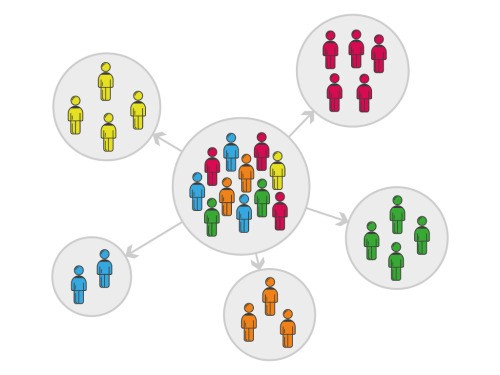

# <p style="background-color:#00CED1;font-family:Georgia;color:white;text-align:left;border-radius:20px 20px;"><b>About Dataset</b></p>

**Brazilian E-Commerce Public Dataset by Olist**= https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

Welcome! This is a Brazilian ecommerce public dataset of orders made at Olist Store. The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers. We also released a geolocation dataset that relates Brazilian zip codes to lat/lng coordinates.

This is real commercial data, it has been anonymised, and references to the companies and partners in the review text have been replaced with the names of Game of Thrones great houses.

**Context**

This dataset was generously provided by Olist, the largest department store in Brazilian marketplaces. Olist connects small businesses from all over Brazil to channels without hassle and with a single contract. Those merchants are able to sell their products through the Olist Store and ship them directly to the customers using Olist logistics partners. See more on our website: www.olist.com

After a customer purchases the product from Olist Store a seller gets notified to fulfill that order. Once the customer receives the product, or the estimated delivery date is due, the customer gets a satisfaction survey by email where he can give a note for the purchase experience and write down some comments.

**Attention**

An order might have multiple items.

Each item might be fulfilled by a distinct seller.

All text identifying stores and partners where replaced by the names of Game of Thrones great houses.

# <p style="background-color:#00CED1;font-family:Georgia;color:white;text-align:left;border-radius:20px 20px;"><b>Importing Libraries and Dataset</b></p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import datetime as dt

In [2]:
customers_df= pd.read_csv('data//olist_customers_dataset.csv')
geolocation_df= pd.read_csv("data//olist_geolocation_dataset.csv")
items_df= pd.read_csv('data//olist_order_items_dataset.csv')
payments_df= pd.read_csv('data//olist_order_payments_dataset.csv')
reviews_df= pd.read_csv('data//olist_order_reviews_dataset.csv')
orders_df= pd.read_csv('data//olist_orders_dataset.csv')
products_df= pd.read_csv('data//olist_products_dataset.csv')
sellers_df= pd.read_csv('data//olist_sellers_dataset.csv')
category_translation_df= pd.read_csv('data//product_category_name_translation.csv')

# <p style="background-color:#00CED1;font-family:Georgia;color:white;text-align:left;border-radius:20px 20px;"><b>Understanding the Dataset (EDA & Data Preprocessing)</b></p>

In [3]:
customers_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [4]:
geolocation_df

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [5]:
items_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [6]:
payments_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [7]:
reviews_df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [8]:
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [9]:
products_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [10]:
sellers_df

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [11]:
category_translation_df

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


Let's check null values and duplicate rows:

In [12]:
datasets = [customers_df, geolocation_df, items_df, payments_df, reviews_df, orders_df, products_df, sellers_df, category_translation_df]
titles = ["customers", "geolocation", "items", "payments", "reviews", "orders", "products", "sellers", "category_translation"]

data_summary = pd.DataFrame({},)
data_summary['datasets']= titles
data_summary['columns'] = [', '.join([col for col, null in data.isnull().sum().items() ]) for data in datasets]
data_summary['total_rows']= [data.shape[0] for data in datasets]
data_summary['total_cols']= [data.shape[1] for data in datasets]
data_summary['total_duplicate']= [len(data[data.duplicated()]) for data in datasets]
data_summary['total_null']= [data.isnull().sum().sum() for data in datasets]
data_summary['null_cols'] = [', '.join([col for col, null in data.isnull().sum().items() if null > 0]) for data in datasets]
data_summary.style.background_gradient(cmap='YlGnBu')

,datasets,columns,total_rows,total_cols,total_duplicate,total_null,null_cols
0,customers,"customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state",99441,5,0,0,
1,geolocation,"geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state",1000163,5,261831,0,
2,items,"order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value",112650,7,0,0,
3,payments,"order_id, payment_sequential, payment_type, payment_installments, payment_value",103886,5,0,0,
4,reviews,"review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp",99224,7,0,145903,"review_comment_title, review_comment_message"
5,orders,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date",99441,8,0,4908,"order_approved_at, order_delivered_carrier_date, order_delivered_customer_date"
6,products,"product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm",32951,9,0,2448,"product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm"
7,sellers,"seller_id, seller_zip_code_prefix, seller_city, seller_state",3095,4,0,0,
8,category_translation,"product_category_name, product_category_name_english",71,2,0,0,


Let's drop them:

In [13]:
for i in datasets:
    i.dropna(inplace=True)

In [14]:
for i in datasets:
    i.drop(i[i.duplicated()].index, axis=0, inplace=True)

Checking again...

In [15]:
data_summary = pd.DataFrame({},)
data_summary['datasets']= titles
data_summary['columns'] = [', '.join([col for col, null in data.isnull().sum().items() ]) for data in datasets]
data_summary['total_rows']= [data.shape[0] for data in datasets]
data_summary['total_cols']= [data.shape[1] for data in datasets]
data_summary['total_duplicate']= [len(data[data.duplicated()]) for data in datasets]
data_summary['total_null']= [data.isnull().sum().sum() for data in datasets]
data_summary['null_cols'] = [', '.join([col for col, null in data.isnull().sum().items() if null > 0]) for data in datasets]
data_summary.style.background_gradient(cmap='YlGnBu')

,datasets,columns,total_rows,total_cols,total_duplicate,total_null,null_cols
0,customers,"customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state",99441,5,0,0,
1,geolocation,"geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state",738332,5,0,0,
2,items,"order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value",112650,7,0,0,
3,payments,"order_id, payment_sequential, payment_type, payment_installments, payment_value",103886,5,0,0,
4,reviews,"review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp",9839,7,0,0,
5,orders,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date",96461,8,0,0,
6,products,"product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm",32340,9,0,0,
7,sellers,"seller_id, seller_zip_code_prefix, seller_city, seller_state",3095,4,0,0,
8,category_translation,"product_category_name, product_category_name_english",71,2,0,0,


In [16]:
for i in datasets:
    i.info()
    print("*"*50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
**************************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 738332 entries, 0 to 1000161
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  738332 non-null  int64  
 1   geolocation_lat              738332 non-null  float64
 2   geolocation_lng              738332 non-null  float64
 3   ge

## Merging All Dataframes

In [17]:
merged_df= pd.merge(customers_df, orders_df, on="customer_id")
merged_df= merged_df.merge(reviews_df, on="order_id")
merged_df= merged_df.merge(items_df, on="order_id")
merged_df= merged_df.merge(products_df, on="product_id")
merged_df= merged_df.merge(payments_df, on="order_id")
merged_df= merged_df.merge(sellers_df, on='seller_id')
merged_df= merged_df.merge(category_translation_df, on='product_category_name')
merged_df.shape

(11578, 40)

In [18]:
merged_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,15.0,35.0,1,credit_card,8,252.25,14940,ibitinga,SP,home_confort
1,ed9d62c3af1f6b24e984d012f66eca35,6a8fdf11c6cc553fe201f827da2f4e65,45970,itanhem,BA,1dfe970583e8a1a09241aa32a815a5b4,delivered,2018-07-18 17:21:49,2018-07-18 17:35:14,2018-07-19 14:43:00,...,15.0,35.0,1,credit_card,10,278.66,14940,ibitinga,SP,home_confort
2,9dca8837b7f9fc25ae379a58bb66094d,c207b575c7935606edefd74a43419a21,6317,carapicuiba,SP,27fee5c620c806ed4f239ed553fca699,delivered,2018-05-22 12:27:08,2018-05-22 12:56:01,2018-05-22 15:36:00,...,10.0,40.0,1,credit_card,8,95.57,14940,ibitinga,SP,home_confort
3,e19274edf7a9c51689822810be84c9e9,854c37b10f4e835f6bc91355c9a7346c,5772,sao paulo,SP,6f6785dde266434130a2aa8af06a52b7,delivered,2018-06-05 12:14:43,2018-06-05 14:31:37,2018-06-07 08:29:00,...,10.0,40.0,1,credit_card,2,98.68,14940,ibitinga,SP,home_confort
4,3d54e262ab34438486bd0eb8bf022c2f,f2479f8d117c49610d5a2d006b4ab716,91240,porto alegre,RS,00f251b943aba645652c7138e4716fee,delivered,2018-08-13 11:18:25,2018-08-13 11:44:26,2018-08-13 14:37:00,...,10.0,40.0,1,credit_card,1,101.25,14940,ibitinga,SP,home_confort
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11573,806be13e55f43711b59f751f9ee83022,7eeb6421712844795dd8ff9ec6a58b18,33823,ribeirao das neves,MG,6232b520aa859c47ba46e5213737f418,delivered,2018-06-15 12:52:05,2018-06-15 13:27:02,2018-06-19 13:53:00,...,5.0,18.0,1,credit_card,4,95.65,5126,sao paulo,SP,fashion_underwear_beach
11574,806be13e55f43711b59f751f9ee83022,7eeb6421712844795dd8ff9ec6a58b18,33823,ribeirao das neves,MG,6232b520aa859c47ba46e5213737f418,delivered,2018-06-15 12:52:05,2018-06-15 13:27:02,2018-06-19 13:53:00,...,5.0,18.0,1,credit_card,4,95.65,5126,sao paulo,SP,fashion_underwear_beach
11575,806be13e55f43711b59f751f9ee83022,7eeb6421712844795dd8ff9ec6a58b18,33823,ribeirao das neves,MG,6232b520aa859c47ba46e5213737f418,delivered,2018-06-15 12:52:05,2018-06-15 13:27:02,2018-06-19 13:53:00,...,5.0,18.0,1,credit_card,4,95.65,5126,sao paulo,SP,fashion_underwear_beach
11576,806be13e55f43711b59f751f9ee83022,7eeb6421712844795dd8ff9ec6a58b18,33823,ribeirao das neves,MG,6232b520aa859c47ba46e5213737f418,delivered,2018-06-15 12:52:05,2018-06-15 13:27:02,2018-06-19 13:53:00,...,5.0,18.0,1,credit_card,4,95.65,5126,sao paulo,SP,fashion_underwear_beach


In [19]:
merged_df.isnull().sum()

customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
review_id                        0
review_score                     0
review_comment_title             0
review_comment_message           0
review_creation_date             0
review_answer_timestamp          0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g    

In [20]:
len(merged_df[merged_df.duplicated()])

0

In [21]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 0 to 11577
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_id                    11578 non-null  object 
 1   customer_unique_id             11578 non-null  object 
 2   customer_zip_code_prefix       11578 non-null  int64  
 3   customer_city                  11578 non-null  object 
 4   customer_state                 11578 non-null  object 
 5   order_id                       11578 non-null  object 
 6   order_status                   11578 non-null  object 
 7   order_purchase_timestamp       11578 non-null  object 
 8   order_approved_at              11578 non-null  object 
 9   order_delivered_carrier_date   11578 non-null  object 
 10  order_delivered_customer_date  11578 non-null  object 
 11  order_estimated_delivery_date  11578 non-null  object 
 12  review_id                      11578 non-null 

Let's convert time columns to pd.datetime...

In [22]:
time_columns= ['order_purchase_timestamp', 'order_approved_at','order_delivered_carrier_date','order_delivered_customer_date',
               'order_estimated_delivery_date', 'review_creation_date', 'review_answer_timestamp', 'shipping_limit_date']

In [23]:
merged_df[time_columns]=merged_df[time_columns].apply(pd.to_datetime)

In [24]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 0 to 11577
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    11578 non-null  object        
 1   customer_unique_id             11578 non-null  object        
 2   customer_zip_code_prefix       11578 non-null  int64         
 3   customer_city                  11578 non-null  object        
 4   customer_state                 11578 non-null  object        
 5   order_id                       11578 non-null  object        
 6   order_status                   11578 non-null  object        
 7   order_purchase_timestamp       11578 non-null  datetime64[ns]
 8   order_approved_at              11578 non-null  datetime64[ns]
 9   order_delivered_carrier_date   11578 non-null  datetime64[ns]
 10  order_delivered_customer_date  11578 non-null  datetime64[ns]
 11  order_estimated

# <p style="background-color:#00CED1;font-family:Georgia;color:white;text-align:left;border-radius:20px 20px;"><b>RFM Analysis (recency, frequency, monetary)</b></p>

The “RFM” in RFM analysis stands for recency, frequency and monetary value. RFM analysis is a way to use data based on existing customer behavior to predict how a new customer is likely to act in the future. An RFM model is built using three key factors:

- how recently a customer has transacted with a brand
- how frequently they’ve engaged with a brand
- how much money they’ve spent on a brand’s products and services

a basic CRM system can perform rudimentary tracking of the three easily quantifiable characteristics that contribute to RFM analysis:

- **Recency value**: This refers to the amount of time since a customer’s last interaction with a brand, which can include their last purchase, a visit to a website, use of a mobile app, a “like” on social media and more. Recency is a key metric because customers who have interacted with your brand more recently are more likely to respond to new marketing efforts.

- **Frequency value**: This refers to the number of times a customer has made a purchase or otherwise interacted with your brand during a particular period of time. Frequency is a key metric because it shows how deeply a customer is engaged with your brand. Greater frequency indicates a higher degree of customer loyalty.

- **Monetary value**: This refers to the total amount a customer has spent purchasing products and services from your brand over a particular period of time. Monetary value is a key metric because the customers who have spent the most in the past are more likely to spend more in the future.

Source: https://www.actioniq.com/blog/what-is-rfm-analysis/

For analysis, Let's determine current date (2 days after the last date):

In [25]:
present_day = merged_df['order_purchase_timestamp'].max() + dt.timedelta(days=2)
present_day

Timestamp('2018-08-31 14:18:28')

In [26]:
print("Latest date in dataset: ", merged_df['order_purchase_timestamp'].max())

Latest date in dataset:  2018-08-29 14:18:28


Let's define "Recency", "Frequency", "Monetary" values:

In [27]:
recency_df= pd.DataFrame(merged_df.groupby(by='customer_unique_id', as_index=False)['order_purchase_timestamp'].max())
recency_df

,customer_unique_id,order_purchase_timestamp
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,000ec5bff359e1c0ad76a81a45cb598f,2018-08-21 11:34:26
2,00172711b30d52eea8b313a7f2cced02,2018-07-28 00:23:49
3,001928b561575b2821c92254a2327d06,2018-08-24 21:17:00
4,0019e8c501c85848ac0966d45226fa1d,2018-05-01 09:25:32
...,...,...
9328,ffeb904468642a1ce663a322629801cb,2018-06-27 11:57:41
9329,ffecceca389973ef16660d58696f281e,2018-04-25 12:08:11
9330,fff2ae16b99c6f3c785f0e052f2a9cfb,2018-04-20 11:03:47
9331,fff3e1d7bc75f11dc7670619b2e61840,2018-07-20 13:47:30


In [28]:
recency_df['Recency']= recency_df['order_purchase_timestamp'].apply(lambda x: (present_day - x).days)
recency_df

,customer_unique_id,order_purchase_timestamp,Recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,113
1,000ec5bff359e1c0ad76a81a45cb598f,2018-08-21 11:34:26,10
2,00172711b30d52eea8b313a7f2cced02,2018-07-28 00:23:49,34
3,001928b561575b2821c92254a2327d06,2018-08-24 21:17:00,6
4,0019e8c501c85848ac0966d45226fa1d,2018-05-01 09:25:32,122
...,...,...,...
9328,ffeb904468642a1ce663a322629801cb,2018-06-27 11:57:41,65
9329,ffecceca389973ef16660d58696f281e,2018-04-25 12:08:11,128
9330,fff2ae16b99c6f3c785f0e052f2a9cfb,2018-04-20 11:03:47,133
9331,fff3e1d7bc75f11dc7670619b2e61840,2018-07-20 13:47:30,42


In [29]:
frequency_df = pd.DataFrame(merged_df.groupby(["customer_unique_id"]).agg({"order_id":"nunique"}).reset_index())
frequency_df.rename(columns={"order_id":"Frequency"}, inplace=True)
frequency_df

,customer_unique_id,Frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,000ec5bff359e1c0ad76a81a45cb598f,1
2,00172711b30d52eea8b313a7f2cced02,1
3,001928b561575b2821c92254a2327d06,1
4,0019e8c501c85848ac0966d45226fa1d,1
...,...,...
9328,ffeb904468642a1ce663a322629801cb,1
9329,ffecceca389973ef16660d58696f281e,1
9330,fff2ae16b99c6f3c785f0e052f2a9cfb,1
9331,fff3e1d7bc75f11dc7670619b2e61840,1


In [30]:
monetary_df = merged_df.groupby('customer_unique_id', as_index=False)['payment_value'].sum()
monetary_df.columns = ['customer_unique_id', 'Monetary']
monetary_df.head()

,customer_unique_id,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,000ec5bff359e1c0ad76a81a45cb598f,27.75
2,00172711b30d52eea8b313a7f2cced02,122.07
3,001928b561575b2821c92254a2327d06,329.62
4,0019e8c501c85848ac0966d45226fa1d,197.27


Let's merge them:

In [31]:
RF_df = recency_df.merge(frequency_df, on='customer_unique_id')
RFM_df = RF_df.merge(monetary_df, on='customer_unique_id').drop(columns='order_purchase_timestamp')
RFM_df.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,113,1,141.90
1,000ec5bff359e1c0ad76a81a45cb598f,10,1,27.75
2,00172711b30d52eea8b313a7f2cced02,34,1,122.07
3,001928b561575b2821c92254a2327d06,6,1,329.62
4,0019e8c501c85848ac0966d45226fa1d,122,1,197.27


In [32]:
RFM_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,9333.0,74.851709,42.532132,2.00,37.00,75.00,112.00,483.00
Frequency,9333.0,1.011036,0.108502,1.00,1.00,1.00,1.00,3.00
Monetary,9333.0,245.638111,641.607276,13.89,68.18,122.42,217.55,29099.52


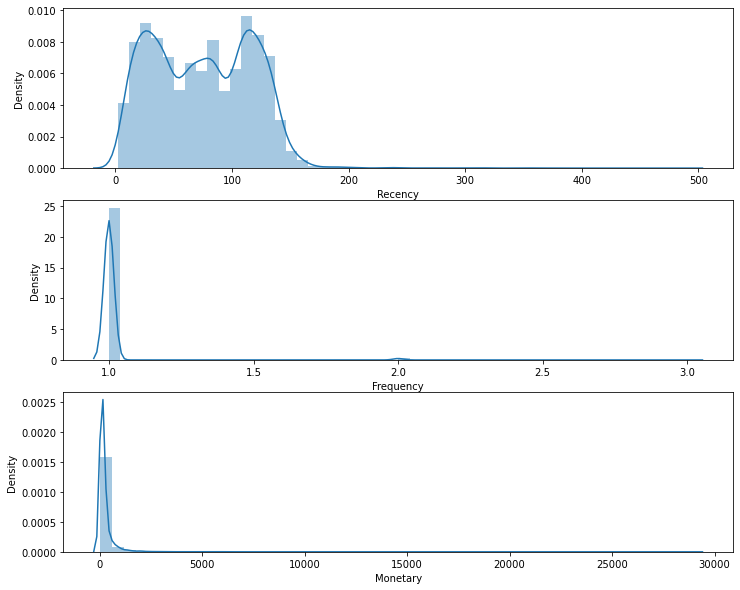

In [33]:
plt.figure(figsize=(12, 10))
plt.subplot(3, 1, 1); sns.distplot(RFM_df['Recency'])
plt.subplot(3, 1, 2); sns.distplot(RFM_df['Frequency'])
plt.subplot(3, 1, 3); sns.distplot(RFM_df['Monetary'])
plt.show()

In [34]:
RFM_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9333 entries, 0 to 9332
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_unique_id  9333 non-null   object 
 1   Recency             9333 non-null   int64  
 2   Frequency           9333 non-null   int64  
 3   Monetary            9333 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 364.6+ KB


## Checking outliers

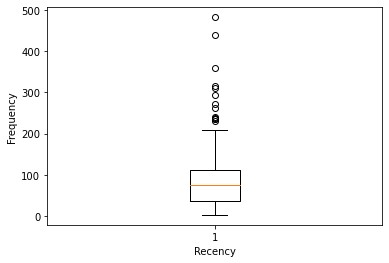

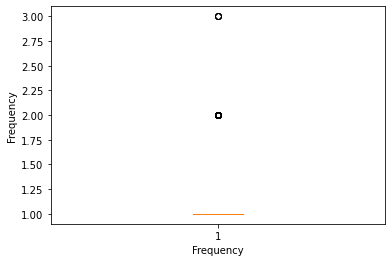

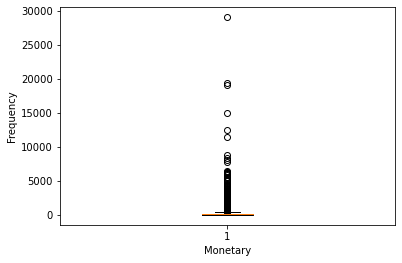

In [35]:
for i in ["Recency", "Frequency", "Monetary"]:
    plt.figure()
    plt.tight_layout()
    plt.gca().set(xlabel= i, ylabel='Frequency')
    plt.boxplot(RFM_df[i])

Let's check outliers that fall with +/- 5% boundaries:

In [36]:
def num_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.05)
    q3 = df_in[col_name].quantile(0.95)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    outliers_df= df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)]
    return print("Number of outliers in {} column: ".format(col_name), len(outliers_df)), print("Indexes: ", outliers_df.index)

In [37]:
for i in ["Recency", "Frequency", "Monetary"]:
    num_outlier(RFM_df, i)
    print("*"*40)

Number of outliers in Recency column:  3
Indexes:  Int64Index([828, 2463, 2476], dtype='int64')
****************************************
Number of outliers in Frequency column:  99
Indexes:  Int64Index([  40,   96,  110,  138,  185,  238,  332,  335,  373,  508,  551,
             703,  874, 1093, 1234, 1333, 1428, 1500, 1739, 1786, 2146, 2156,
            2312, 2397, 2402, 2829, 2852, 2899, 2925, 2971, 3084, 3117, 3166,
            3668, 3740, 3824, 3849, 3928, 3938, 4102, 4113, 4221, 4235, 4292,
            4332, 4412, 4442, 4524, 4590, 4681, 4689, 4858, 4912, 5079, 5382,
            5412, 5500, 5672, 5763, 5900, 5945, 6005, 6083, 6090, 6108, 6172,
            6198, 6274, 6389, 6455, 6591, 6694, 6774, 6792, 7160, 7222, 7541,
            7590, 7651, 7763, 7807, 7982, 8085, 8151, 8257, 8417, 8428, 8609,
            8719, 8768, 8786, 8864, 8906, 8951, 8996, 9074, 9185, 9186, 9279],
           dtype='int64')
****************************************
Number of outliers in Monetary column: 

In [38]:
RFM_df.shape

(9333, 4)

Let's remove outliers that fall with +/- 5% boundaries, except Frequency columns:

In [39]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.05)
    q3 = df_in[col_name].quantile(0.95)
    iqr = q3-q1     
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    index_outliers= df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)].index
    df_in= pd.DataFrame(df_in.drop(index_outliers.to_list(), axis=0, inplace=True))
    print("Outliers in the {} column have been removed".format(col_name))
    return df_in

In [40]:
for i in ["Recency", "Monetary"]:
    remove_outlier(RFM_df, i)
    print("*"*40)

Outliers in the Recency column have been removed
****************************************
Outliers in the Monetary column have been removed
****************************************


In [41]:
RFM_df.shape

(9230, 4)

In [42]:
RFM_df2= RFM_df.copy()
RFM_df2= RFM_df2.set_index('customer_unique_id')
RFM_df2

,Recency,Frequency,Monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,113,1,141.90
000ec5bff359e1c0ad76a81a45cb598f,10,1,27.75
00172711b30d52eea8b313a7f2cced02,34,1,122.07
001928b561575b2821c92254a2327d06,6,1,329.62
0019e8c501c85848ac0966d45226fa1d,122,1,197.27
...,...,...,...
ffeb904468642a1ce663a322629801cb,65,1,93.11
ffecceca389973ef16660d58696f281e,128,1,72.76
fff2ae16b99c6f3c785f0e052f2a9cfb,133,1,200.90


# <p style="background-color:#00CED1;font-family:Georgia;color:white;text-align:left;border-radius:20px 20px;"><b>Creating RFM Segments</b></p>

In [43]:
RFM_df2["recency_score"]  = pd.qcut(RFM_df2['Recency'], 5, labels=[5, 4, 3, 2, 1])
RFM_df2["frequency_score"]= pd.qcut(RFM_df2['Frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
RFM_df2["monetary_score"] = pd.qcut(RFM_df2['Monetary'], 5, labels=[1, 2, 3, 4, 5])

Concatanated RFM scores:

In [44]:
RFM_df2['RFM_SCORE'] = RFM_df2.recency_score.astype(str)+ RFM_df2.frequency_score.astype(str) + RFM_df2.monetary_score.astype(str)
RFM_df2

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_SCORE
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,113,1,141.90,2,1,3,213
000ec5bff359e1c0ad76a81a45cb598f,10,1,27.75,5,1,1,511
00172711b30d52eea8b313a7f2cced02,34,1,122.07,4,1,3,413
001928b561575b2821c92254a2327d06,6,1,329.62,5,1,5,515
0019e8c501c85848ac0966d45226fa1d,122,1,197.27,1,1,4,114
...,...,...,...,...,...,...,...
ffeb904468642a1ce663a322629801cb,65,1,93.11,3,5,2,352
ffecceca389973ef16660d58696f281e,128,1,72.76,1,5,2,152
fff2ae16b99c6f3c785f0e052f2a9cfb,133,1,200.90,1,5,4,154


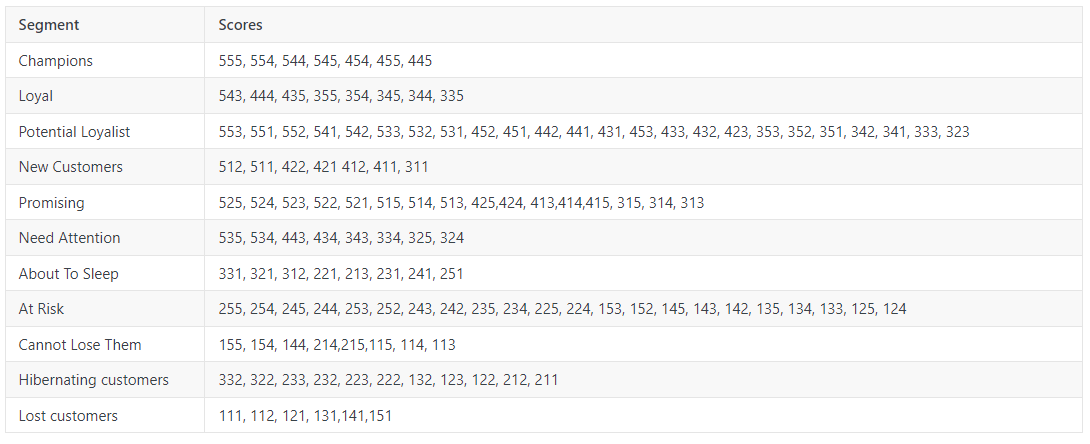
Source: https://documentation.bloomreach.com/engagement/docs/rfm-segmentation

In [45]:
seg_map= {
    r'111|112|121|131|141|151': 'Lost customers',
    r'332|322|233|232|223|222|132|123|122|212|211': 'Hibernating customers', 
    r'155|154|144|214|215|115|114|113': 'Cannot Lose Them',
    r'255|254|245|244|253|252|243|242|235|234|225|224|153|152|145|143|142|135|134|133|125|124': 'At Risk',
    r'331|321|312|221|213|231|241|251': 'About To Sleep',
    r'535|534|443|434|343|334|325|324': 'Need Attention',
    r'525|524|523|522|521|515|514|513|425|424|413|414|415|315|314|313': 'Promising',
    r'512|511|422|421|412|411|311': 'New Customers',
    r'553|551|552|541|542|533|532|531|452|451|442|441|431|453|433|432|423|353|352|351|342|341|333|323': 'Potential Loyalist',
    r'543|444|435|355|354|345|344|335': 'Loyal',
    r'555|554|544|545|454|455|445': 'Champions'
}

In [46]:
RFM_df2['Segment'] = RFM_df2['recency_score'].astype(str) + RFM_df2['frequency_score'].astype(str) + RFM_df2['monetary_score'].astype(str)
RFM_df2['Segment'] = RFM_df2['Segment'].replace(seg_map, regex=True)
RFM_df2.head()

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,Segment
customer_unique_id,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,113,1,141.90,2,1,3,213,About To Sleep
000ec5bff359e1c0ad76a81a45cb598f,10,1,27.75,5,1,1,511,New Customers
00172711b30d52eea8b313a7f2cced02,34,1,122.07,4,1,3,413,Promising
001928b561575b2821c92254a2327d06,6,1,329.62,5,1,5,515,Promising
0019e8c501c85848ac0966d45226fa1d,122,1,197.27,1,1,4,114,Cannot Lose Them


In [47]:
RFM_df2['Segment'].unique()

array(['About To Sleep', 'New Customers', 'Promising', 'Cannot Lose Them',
       'Hibernating customers', 'Lost customers', 'Champions', 'At Risk',
       'Potential Loyalist', 'Loyal', 'Need Attention'], dtype=object)

In [48]:
RFM_df2['Segment'].nunique()

11

In [49]:
RFMStats = RFM_df2[["Segment", "Recency", "Frequency", "Monetary"]].groupby("Segment").agg(['mean','median', 'min', 'max', 'count'])
RFMStats

Recency                        Frequency             \
                             mean median  min  max count      mean median min   
Segment                                                                         
About To Sleep          93.025000   96.0   60  117   600  1.001667    1.0   1   
At Risk                117.980271  116.0   89  315  1622  1.012330    1.0   1   
Cannot Lose Them       125.384740  125.0   89  272   616  1.009740    1.0   1   
Champions               30.048682   29.0    2   59   493  1.091278    1.0   1   
Hibernating customers  107.546735  108.0   60  311   781  1.000000    1.0   1   
Lost customers         132.042289  129.0  118  261   402  1.000000    1.0   1   
Loyal                   61.446918   67.0    2   88   584  1.025685    1.0   1   
Need Attention          52.857645   58.0    2   88   569  1.000000    1.0   1   
New Customers           40.662857   38.0    2   88   525  1.000000    1.0   1   
Potential Loyalist      43.570724   40.0    2   88  1824  1.008224    1.0   1   
Promising               37.837727   31.0    2   88  1214  1.000000    1.0   1   

                                   Monetary                                  
                      max count        mean   median     min      max count  
Segment                                                                      
About To Sleep          2   600   56.353850   47.750   14.38   147.57   600  
At Risk                 3  1622  287.677275  175.015   58.63  1919.44  1622  
Cannot Lose Them        2   616  321.003961  209.260   98.43  1890.18   616  
Champions               3   493  404.530974  299.070  149.66  1868.97   493  
Hibernating customers   1   781   87.082330   85.300   16.29   148.94   781  
Lost customers          1   402   48.456219   47.225   17.29    97.38   402  
Loyal                   2   584  403.679452  258.910   97.67  1953.15   584  
Need Attention          1   569  255.796450  180.370   97.65  1679.68   569  
New Customers           1   525   56.816933   53.380   14.29    97.59   525  
Potential Loyalist      2  1824   79.567697   76.360   13.89   149.01  1824  
Promising               1  1214  266.907142  179.155   18.70  1957.20  1214

In [50]:
RFMStats['Ratio']= (100*RFMStats['Monetary']["count"]/RFMStats['Monetary']["count"].sum()).round(2)
RFMStats

Recency                        Frequency             \
                             mean median  min  max count      mean median min   
Segment                                                                         
About To Sleep          93.025000   96.0   60  117   600  1.001667    1.0   1   
At Risk                117.980271  116.0   89  315  1622  1.012330    1.0   1   
Cannot Lose Them       125.384740  125.0   89  272   616  1.009740    1.0   1   
Champions               30.048682   29.0    2   59   493  1.091278    1.0   1   
Hibernating customers  107.546735  108.0   60  311   781  1.000000    1.0   1   
Lost customers         132.042289  129.0  118  261   402  1.000000    1.0   1   
Loyal                   61.446918   67.0    2   88   584  1.025685    1.0   1   
Need Attention          52.857645   58.0    2   88   569  1.000000    1.0   1   
New Customers           40.662857   38.0    2   88   525  1.000000    1.0   1   
Potential Loyalist      43.570724   40.0    2   88  1824  1.008224    1.0   1   
Promising               37.837727   31.0    2   88  1214  1.000000    1.0   1   

                                   Monetary                                  \
                      max count        mean   median     min      max count   
Segment                                                                       
About To Sleep          2   600   56.353850   47.750   14.38   147.57   600   
At Risk                 3  1622  287.677275  175.015   58.63  1919.44  1622   
Cannot Lose Them        2   616  321.003961  209.260   98.43  1890.18   616   
Champions               3   493  404.530974  299.070  149.66  1868.97   493   
Hibernating customers   1   781   87.082330   85.300   16.29   148.94   781   
Lost customers          1   402   48.456219   47.225   17.29    97.38   402   
Loyal                   2   584  403.679452  258.910   97.67  1953.15   584   
Need Attention          1   569  255.796450  180.370   97.65  1679.68   569   
New Customers           1   525   56.816933   53.380   14.29    97.59   525   
Potential Loyalist      2  1824   79.567697   76.360   13.89   149.01  1824   
Promising               1  1214  266.907142  179.155   18.70  1957.20  1214   

                       Ratio  
                              
Segment                       
About To Sleep          6.50  
At Risk                17.57  
Cannot Lose Them        6.67  
Champions               5.34  
Hibernating customers   8.46  
Lost customers          4.36  
Loyal                   6.33  
Need Attention          6.16  
New Customers           5.69  
Potential Loyalist     19.76  
Promising              13.15

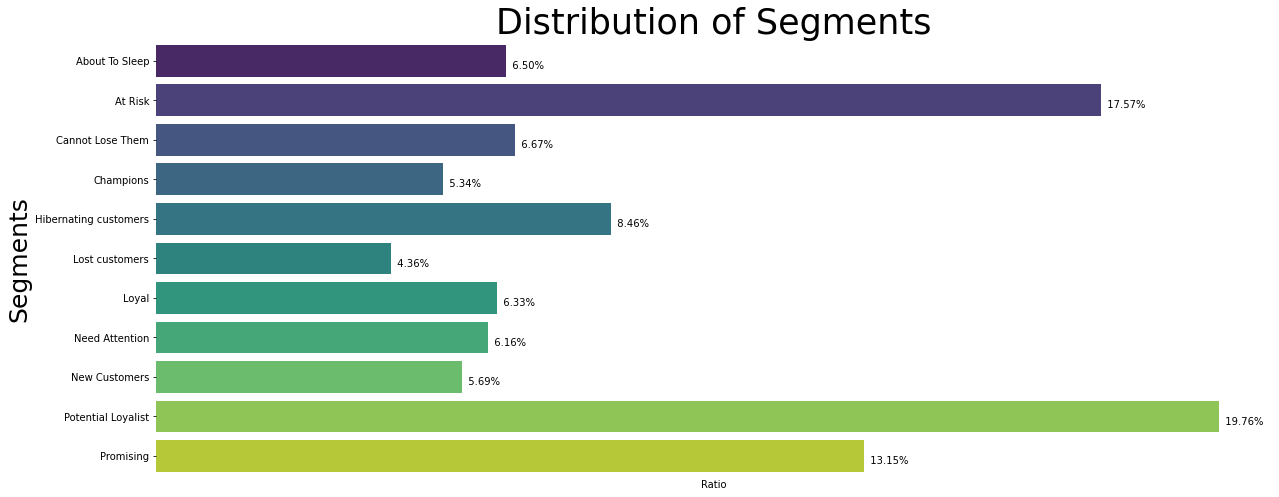

In [51]:
plt.figure(figsize=(20,8))
#plt.rc('font', size=20)
per= sns.barplot(x=RFMStats['Ratio'], y=RFMStats.index, data=RFMStats, palette="viridis")
sns.despine(bottom = True, left = True)
for i, v in enumerate(RFMStats['Ratio']):
    per.text(v, i+.20,"  {:.2f}".format(v)+"%", color='black', ha="left")
per.set_ylabel('Segments', fontsize=25)
per.set(xticks=[])
plt.title('Distribution of Segments', fontsize=35)
plt.show()

In [52]:
!pip install squarify
import squarify

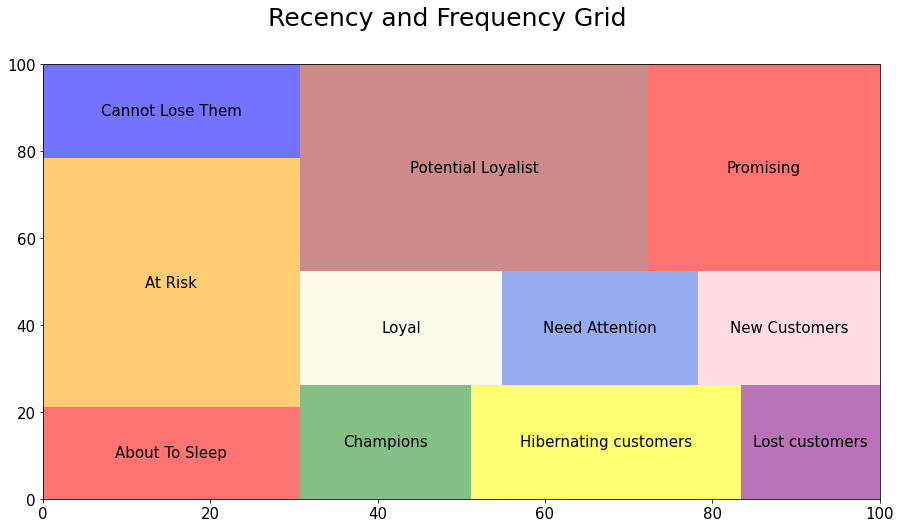

In [53]:
# Treemap by recency/frequency
plt.figure(figsize=(15,8))
plt.rc('font', size=15)
squarify.plot(sizes=RFMStats["Recency"]["count"], label=RFMStats.index, 
              color=["red","orange","blue", "forestgreen", "yellow", "purple", "cornsilk","royalblue", "pink", "brown"], alpha=.55)
plt.suptitle("Recency and Frequency Grid", fontsize=25);

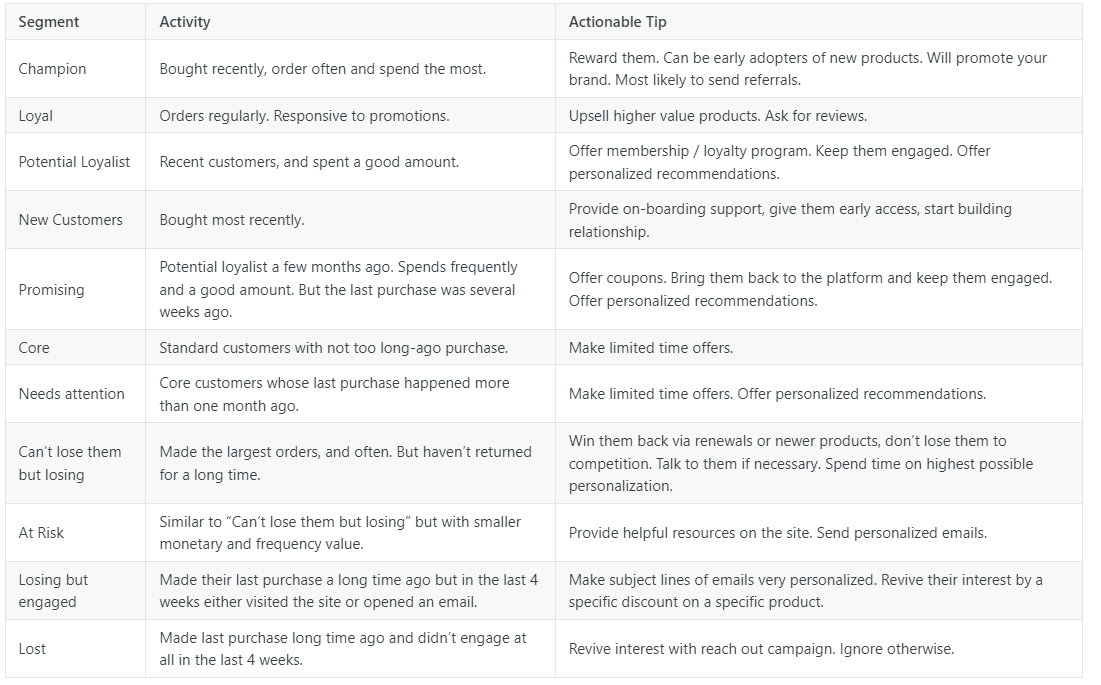
Source: https://documentation.bloomreach.com/engagement/docs/rfm-segmentation

# <p style="background-color:#00CED1;font-family:Georgia;color:white;text-align:left;border-radius:20px 20px;"><b>Clustering with K-Means</b></p>

In [54]:
RFM_df3= RFM_df2.drop(["recency_score", "frequency_score", "monetary_score", "RFM_SCORE", "Segment"], axis=1)
RFM_df3

,Recency,Frequency,Monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,113,1,141.90
000ec5bff359e1c0ad76a81a45cb598f,10,1,27.75
00172711b30d52eea8b313a7f2cced02,34,1,122.07
001928b561575b2821c92254a2327d06,6,1,329.62
0019e8c501c85848ac0966d45226fa1d,122,1,197.27
...,...,...,...
ffeb904468642a1ce663a322629801cb,65,1,93.11
ffecceca389973ef16660d58696f281e,128,1,72.76
fff2ae16b99c6f3c785f0e052f2a9cfb,133,1,200.90


In [55]:
#check if data is skewed
from scipy import stats #library
def check_skew(df, column):
    skew = stats.skew(df[column])
    skewtest = stats.skewtest(df[column])
    plt.title('Distribution of ' + column)
    sns.distplot(df[column])
    plt.show()
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return

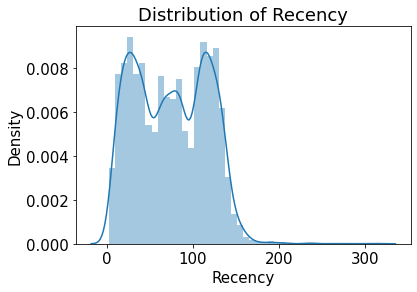

Recency's: Skew: 0.1619372871764706, : SkewtestResult(statistic=6.315734680036571, pvalue=2.6888101178853556e-10)


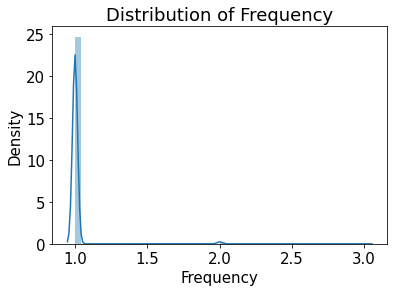

Frequency's: Skew: 10.349645263420909, : SkewtestResult(statistic=103.75024140372159, pvalue=0.0)


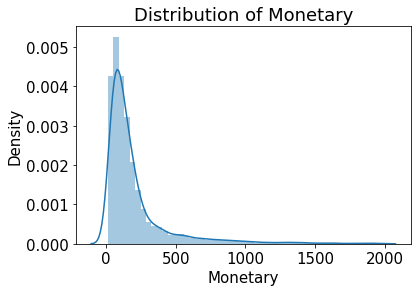

Monetary's: Skew: 3.251446417027698, : SkewtestResult(statistic=67.04111980675697, pvalue=0.0)


In [56]:
for col in RFM_df3.columns:
    check_skew(RFM_df3, col)

- The skewness value greater than 1 or less than -1 indicates a highly skewed distribution.
- The value between 0.5 and 1 or -0.5 and -1 is moderately skewed. 
- The value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical.

Source: https://docs.oracle.com/cd/E57185_01/CBREG/ch03s02s03s01.html#:~:text=A%20skewness%20value%20greater%20than,the%20distribution%20is%20fairly%20symmetrical.

We need to apply log transform for the Frequency and Monetary columns as they are very skewed.

In [57]:
RFM_log= RFM_df3.copy()
for i in RFM_log.columns[1:]:
    RFM_log[i] = np.log10(RFM_log[i])

In [58]:
RFM_log

,Recency,Frequency,Monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,113,0.0,2.151982
000ec5bff359e1c0ad76a81a45cb598f,10,0.0,1.443263
00172711b30d52eea8b313a7f2cced02,34,0.0,2.086609
001928b561575b2821c92254a2327d06,6,0.0,2.518014
0019e8c501c85848ac0966d45226fa1d,122,0.0,2.295061
...,...,...,...
ffeb904468642a1ce663a322629801cb,65,0.0,1.968996
ffecceca389973ef16660d58696f281e,128,0.0,1.861893
fff2ae16b99c6f3c785f0e052f2a9cfb,133,0.0,2.302980


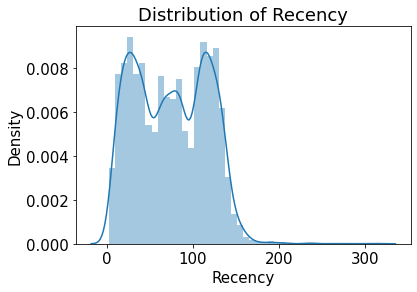

Recency's: Skew: 0.1619372871764706, : SkewtestResult(statistic=6.315734680036571, pvalue=2.6888101178853556e-10)


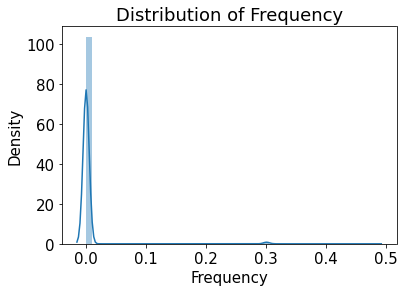

Frequency's: Skew: 9.799276686733617, : SkewtestResult(statistic=102.0025147527467, pvalue=0.0)


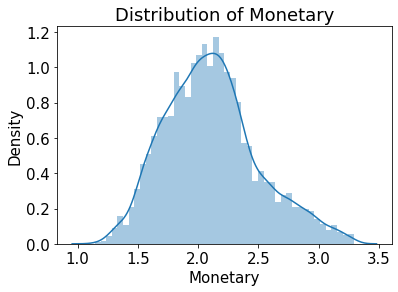

Monetary's: Skew: 0.47086296920199394, : SkewtestResult(statistic=17.58891351121991, pvalue=2.9956623488708254e-69)


In [59]:
for col in RFM_log.columns:
    check_skew(RFM_log, col)

Let's apply StandardScaler:

In [60]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

RFM_log_scaled= scaler.fit_transform(RFM_log)
RFM_log_scaled_df= pd.DataFrame(RFM_log_scaled)
RFM_log_scaled_df.columns = ['recency', 'frequency', 'monetary']
RFM_log_scaled_df.head()

,recency,frequency,monetary
0,0.911949,-0.10293,0.110615
1,-1.537370,-0.10293,-1.706436
2,-0.966655,-0.10293,-0.056993
3,-1.632489,-0.10293,1.049064
4,1.125967,-0.10293,0.477447


In [61]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

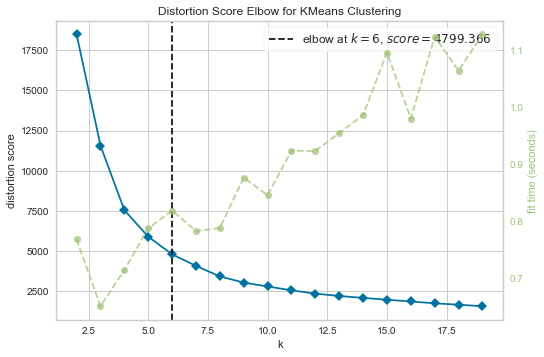

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [62]:
k_means = KMeans()
elbow = KElbowVisualizer(k_means, k=(2, 20))
elbow.fit(RFM_log_scaled_df)
elbow.show()

The optimal K value for Elbow was found to be 6.

In [63]:
kmeans= KMeans(n_clusters=elbow.elbow_value_)
kmeans.fit(RFM_log_scaled_df)

KMeans(n_clusters=6)

In [64]:
RFM_log_scaled_df['Cluster']= kmeans.labels_
RFM_log_scaled_df.head()

,recency,frequency,monetary,Cluster
0,0.911949,-0.10293,0.110615,1
1,-1.537370,-0.10293,-1.706436,0
2,-0.966655,-0.10293,-0.056993,5
3,-1.632489,-0.10293,1.049064,5
4,1.125967,-0.10293,0.477447,1


In [65]:
# Function to visualize clusters
def rfm_clusters_stat(df):
    df_new = df.groupby(['Cluster']).agg({
            'Recency'  : ['mean','median', 'min', 'max'],
            'Frequency': ['mean','median', 'min', 'max'],
            'Monetary' : ['mean','median', 'min', 'max', 'count']
        }).round(0)

    return df_new

In [66]:
RFM_df4= RFM_df3.copy()
RFM_df4['Cluster'] = kmeans.labels_
RFM_df4

,Recency,Frequency,Monetary,Cluster
customer_unique_id,,,,
0000366f3b9a7992bf8c76cfdf3221e2,113,1,141.90,1
000ec5bff359e1c0ad76a81a45cb598f,10,1,27.75,0
00172711b30d52eea8b313a7f2cced02,34,1,122.07,5
001928b561575b2821c92254a2327d06,6,1,329.62,5
0019e8c501c85848ac0966d45226fa1d,122,1,197.27,1
...,...,...,...,...
ffeb904468642a1ce663a322629801cb,65,1,93.11,0
ffecceca389973ef16660d58696f281e,128,1,72.76,4
fff2ae16b99c6f3c785f0e052f2a9cfb,133,1,200.90,1


In [67]:
rfm_clusters_stat(RFM_df4).style.background_gradient(cmap='YlGnBu')

- Most customers haven't placed an order in a while.
- Frequency feature did not add much to the model, as most customers placed only one order on average.

In [68]:
RFM_stats= pd.DataFrame(rfm_clusters_stat(RFM_df4))

Text(0.5, 0.98, 'Segments of Customers')

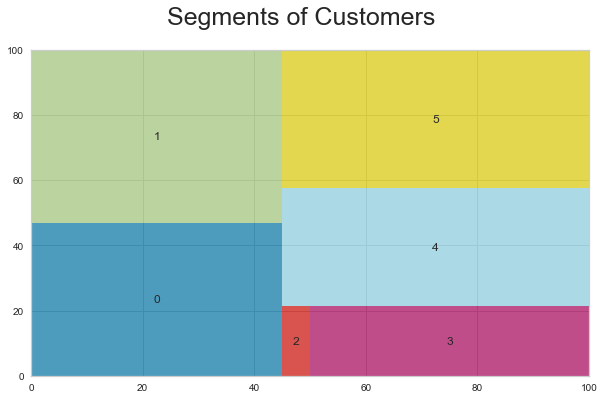

In [69]:
# Visualize Segments
plt.figure(figsize=(10, 6))
squarify.plot(sizes=RFM_stats["Monetary"]["count"], label=RFM_stats.index, color=["b","g","r","m","c", "y"], alpha=0.7)
plt.suptitle("Segments of Customers", fontsize=25)

Thanks for reading 😀 Please vote me!